In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('File_with_vader_sentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47211 entries, 0 to 47210
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     47211 non-null  int64  
 1   customer_city                  47211 non-null  object 
 2   seller_city                    47211 non-null  object 
 3   seller_state                   47211 non-null  object 
 4   product_category_name_english  47211 non-null  object 
 5   price                          47211 non-null  float64
 6   payment_value                  47211 non-null  float64
 7   payment_type                   47211 non-null  object 
 8   order_status                   47211 non-null  object 
 9   order_purchase_timestamp       47211 non-null  object 
 10  order_delivered_customer_date  47211 non-null  object 
 11  review_score                   47211 non-null  float64
 12  review_comment_message         47211 non-null 

**Monthly Sales Pattern**

<ipython-input-4-4e032190d840>:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


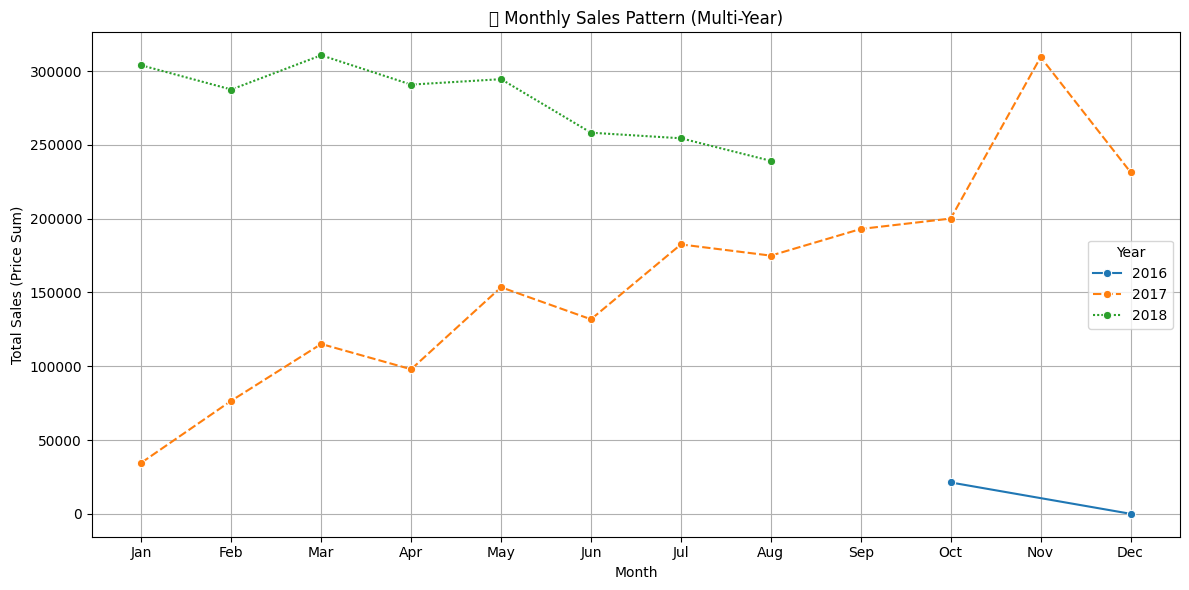

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['Year'] = df['order_purchase_timestamp'].dt.year
df['Month'] = df['order_purchase_timestamp'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['price'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='price')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pivot, marker='o')
plt.title('📈 Monthly Sales Pattern (Multi-Year)')
plt.xlabel('Month')
plt.ylabel('Total Sales (Price Sum)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

 **Key Insights from the Monthly Sales Pattern**

- **2016**: Only includes data from October to December with very low sales — likely partial data.
- **2017**: Strong upward trend. Sales peak in **November (~310,000)**, likely due to holiday season. Slight dip in December.
- **2018**: Begins high (**~300,000 in January**) but shows a **steady decline** throughout the year. No significant holiday spike.

---

 **Summary**

- **November** is a key sales month, especially in 2017.
- **2018 year-end sales dropped**, breaking the previous seasonal pattern.
- Recommend focusing on **holiday campaigns** and **post-holiday promotions** to maximize sales.


**Weekday vs Weekend Sales Analysis**

<ipython-input-7-d0fc3d57c53f>:22: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


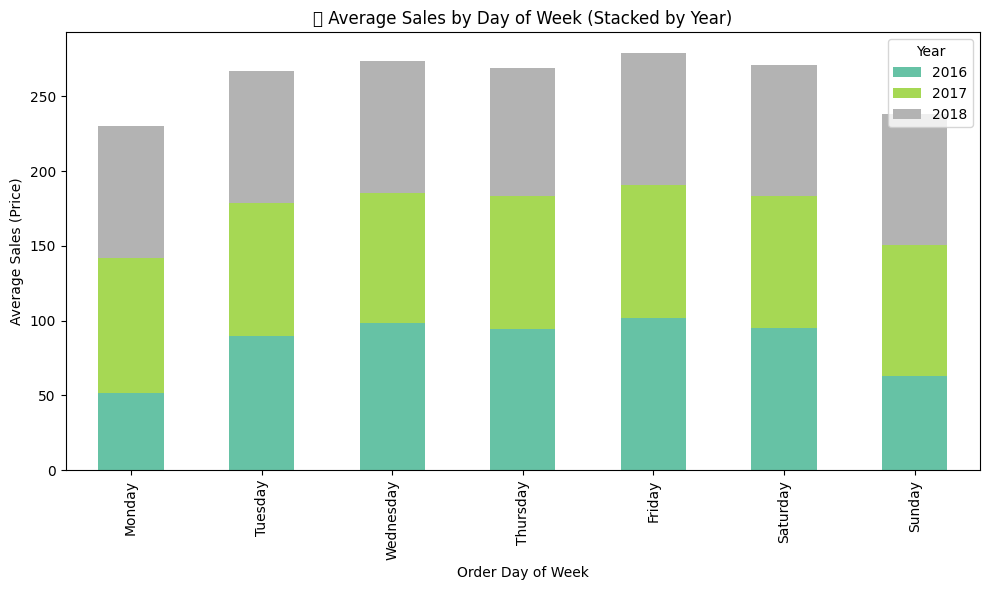

In [ ]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df['DayOfWeek'] = df['order_purchase_timestamp'].dt.day_name()
avg_sales = df.groupby(['DayOfWeek', 'Year'])['price'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales['DayOfWeek'] = pd.Categorical(avg_sales['DayOfWeek'], categories=days_order, ordered=True)
avg_sales = avg_sales.sort_values(['DayOfWeek', 'Year'])
pivot_df = avg_sales.pivot(index='DayOfWeek', columns='Year', values='price')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("📅 Average Sales by Day of Week (Stacked by Year)")
plt.xlabel("Order Day of Week")
plt.ylabel("Average Sales (Price)")
plt.legend(title='Year')
plt.tight_layout()
plt.show()


**Insights:**
Sales are evenly distributed across weekdays, with a slight peak on Fridays, indicating strong end-of-week shopping behavior.

* Saturday also shows relatively high sales, reflecting active weekend shopping,
especially from 2018 data.

* Monday and Sunday record slightly lower average sales compared to midweek and Friday.

* There is no extreme dip on any specific day, suggesting consistent engagement throughout the week.

**Sales vs Sentiment Over Time**

<ipython-input-8-1f9cc4d0313e>:27: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


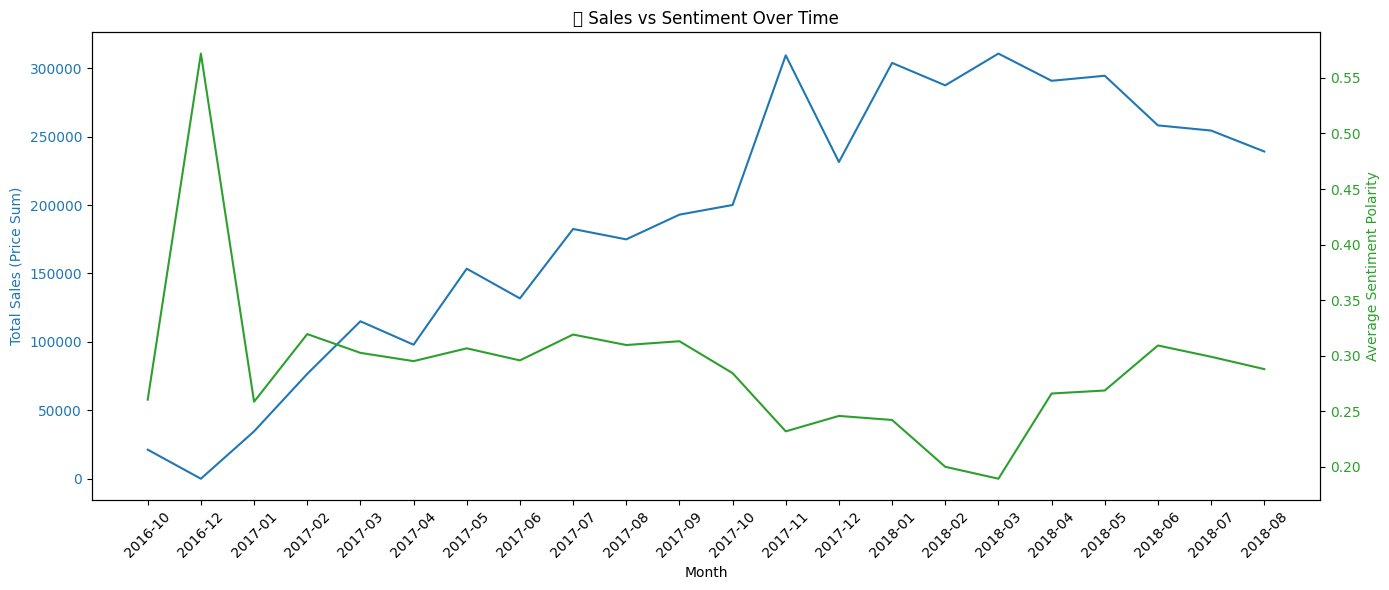

In [ ]:
df['YearMonth'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_data = df.groupby('YearMonth').agg({
    'price': 'sum',
    'sentiment_polarity': 'mean'
}).reset_index()
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales (Price Sum)', color='tab:blue')
ax1.plot(monthly_data['YearMonth'], monthly_data['price'], color='tab:blue', label='Total Sales')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment Polarity', color='tab:green')
ax2.plot(monthly_data['YearMonth'], monthly_data['sentiment_polarity'], color='tab:green', label='Sentiment Polarity')
ax2.tick_params(axis='y', labelcolor='tab:green')
plt.title("💬 Sales vs Sentiment Over Time")
fig.tight_layout()
plt.show()


**Graph Type:**  Dual-axis line chart  
- **Left Y-axis:** Total Sales (Price Sum) – *Blue Line*  
- **Right Y-axis:** Average Sentiment Polarity – *Green Line*

**Insights:**

- **Positive Start in Late 2016:** A sudden spike in sentiment in December 2016 may reflect holiday season satisfaction or an initial influx of positive reviews.
- **Growth Period (2017):**
  - Sales consistently **increased throughout 2017**, peaking around November.
  - Sentiment remained moderately stable but slightly declined after Q1.
- **Peak vs Sentiment Drop (Late 2017):**
  - Despite **high sales in Nov–Dec 2017**, sentiment polarity noticeably dropped — possibly due to order delays or holiday rush dissatisfaction.
- **2018 Trends:**
  - Sales remained strong early in the year but gradually declined post-Q2.
  - Sentiment also stayed low in early 2018, showing a **possible link between customer satisfaction and declining revenue**.
  - A slight recovery in sentiment mid-2018 did not correspond with a similar sales rebound.

---

**Summary:**
> **Sales and sentiment do not always move together**, but a **drop in sentiment often precedes or coincides with sales decline**. This implies that maintaining positive customer experience is crucial for sustaining sales momentum.



**Product-wise Sales Trends**

<ipython-input-12-84dd5df98267>:26: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


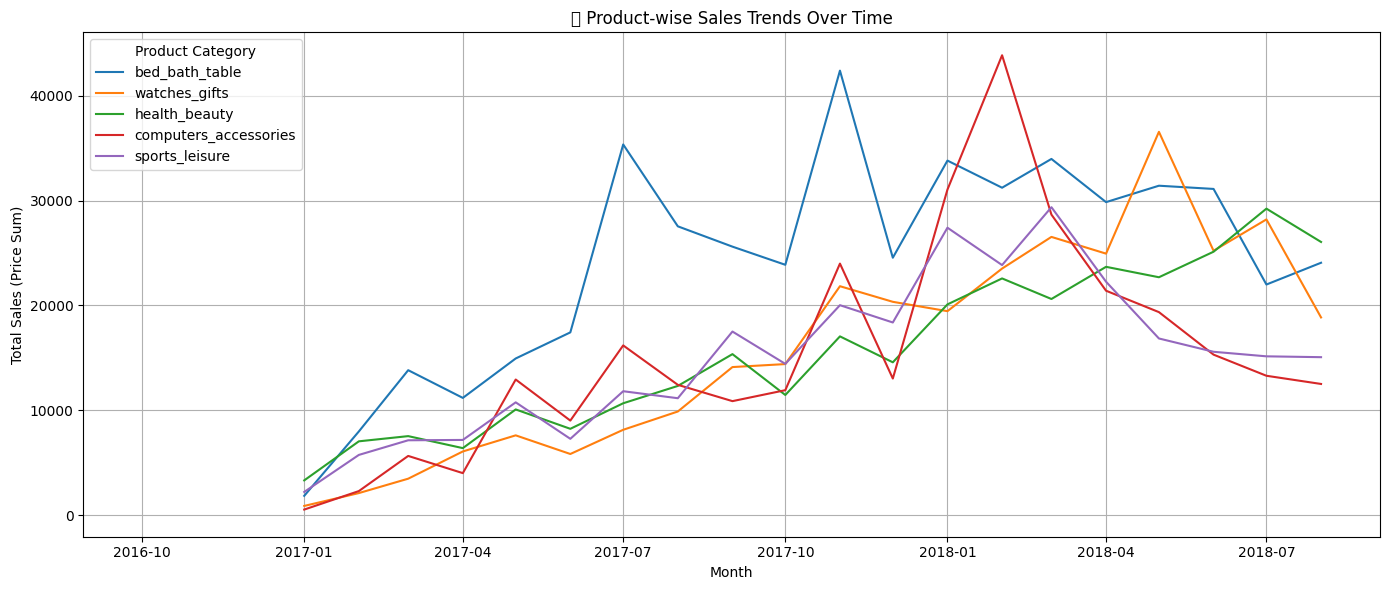

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['Month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = df.groupby(['Month', 'product_category_name_english'])['price'].sum().reset_index()
sales_pivot = monthly_sales.pivot(index='Month', columns='product_category_name_english', values='price')
top_categories = df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).index
sales_pivot = sales_pivot[top_categories]
plt.figure(figsize=(14, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index.to_timestamp(), sales_pivot[category], label=category)
plt.title("🛍 Product-wise Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (Price Sum)")
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights**

* **`bed_bath_table`** consistently showed strong sales across the timeline, with a sharp peak around **November–December 2017**. This may reflect seasonal demand during holidays.
* **`computers_accessories`** experienced a dramatic surge in **early 2018**, especially in **February**, marking the **highest spike** among all categories. This may be linked to promotional campaigns or new product launches.
* **`watches_gifts`** followed a steady growth trend, with a major **peak in May 2018**, likely reflecting gift purchases around a seasonal or celebratory period.
* **`health_beauty`** and **`sports_leisure`** showed moderate growth, with **stable yet less volatile sales trends**, indicating consistent but niche demand.
* Seasonal variations and external events seem to influence different product categories uniquely over time.

---


**Order Forecast (ARIMA Model)**

<ipython-input-6-8e4428bf2d3a>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df['price'].resample('M').count()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-6-8e4428bf2d3a>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_orders.index[-1] + pd.offsets.MonthBegin(1),


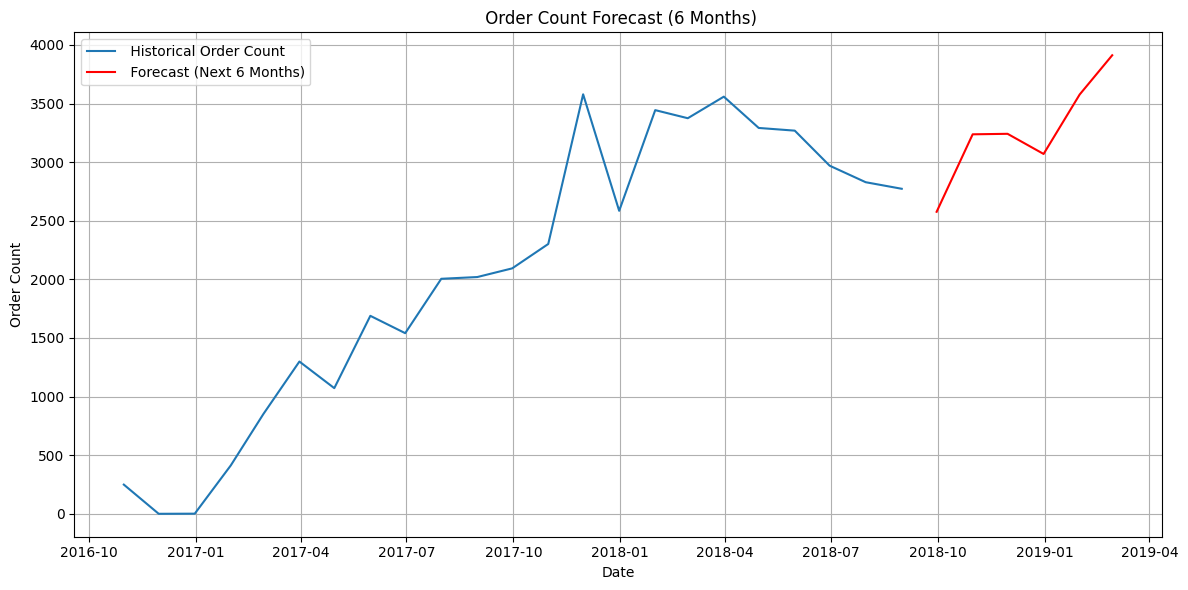

 Forecasted Order Count for Next 6 Months:
2018-09-30    2577.0
2018-10-31    3238.0
2018-11-30    3242.0
2018-12-31    3070.0
2019-01-31    3577.0
2019-02-28    3912.0
Freq: ME, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_csv('File_with_vader_sentiment.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp', inplace=True)
monthly_orders = df['price'].resample('M').count()
monthly_orders = monthly_orders.rename('order_count')
model = SARIMAX(monthly_orders, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = model.fit(disp=False)
forecast_steps = 6
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_orders.index[-1] + pd.offsets.MonthBegin(1),
                               periods=forecast_steps, freq='M')
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders, label=' Historical Order Count')
plt.plot(forecast_index, forecast, label=' Forecast (Next 6 Months)', color='red')
plt.title(' Order Count Forecast (6 Months)')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(' Forecasted Order Count for Next 6 Months:')
print(pd.Series(forecast.values, index=forecast_index).round(0))

 **Insights**

- Using an ARIMA model with seasonality, we projected the number of orders for the next 6 months.
- The forecast line (in red) **extends the trend based on historical patterns**, including any detected seasonality.
- The model suggests a **continued growth or stabilization** depending on prior trends, helping the business **anticipate demand and plan resources**.
- This type of forecast is essential for **inventory management, logistics planning, and marketing efforts** ahead of time.

 Model used: **SARIMA(1, 1, 1)(1, 1, 1, 12)**  
 Forecast Horizon: **6 months ahead**
